In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob
import re

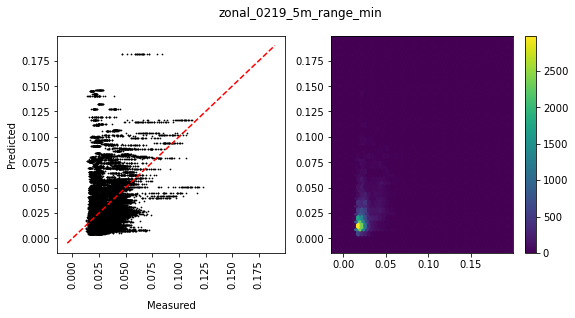

In [82]:
metrics_dir = 'output/rf_metrics/single_date'
predict_dir = 'output/rf_predictions/single_date'

metrics_0219 = sorted(glob(f'{metrics_dir}/0219/*.csv'))
predict_0219 = sorted(glob(f'{predict_dir}/0219/*.csv'))
metrics_0302 = sorted(glob(f'{metrics_dir}/0302/*.csv'))
predict_0302 = sorted(glob(f'{predict_dir}/0302/*.csv'))

metrics = metrics_0219[90:91]
predict = predict_0219[90:91]


for mf, pf in zip(metrics, predict):
    # Set up dataframes
    metrics_df = pd.read_csv(mf, index_col=0)
    metrics_df.index.name = 'run_no'
    predict_df = pd.read_csv(pf, index_col=0)
    predict_df['run_no'] = predict_df['run_no'].astype(int)
    predict_df.index.name = 'sample'
    predict_df.index = predict_df.index % 412 # reset sample count for each run
    predict_df.index = pd.MultiIndex.from_arrays([predict_df['run_no'], predict_df.index])
    predict_df.drop(columns='run_no', inplace=True)

    # Loop through runs for scatter plot
    fig, ax = plt.subplots(1, 2, figsize=(9,4))
   
    ax[0].scatter(predict_df['predict'], predict_df['valid'], s=2, marker='.', color='k')
    ax[j].set_xlim(ax[0].get_ylim())
    ax[0].plot((ax[0].get_xlim()), (ax[0].get_ylim()), 'r--')
    ax[0].set_xticks(ax[0].get_yticks())
    ax[0].tick_params(axis='x', labelrotation=90)
    ax[0].set_xlim(ax[0].get_ylim())
    ax[0].set_xlabel('Measured', labelpad=12)
    ax[0].set_ylabel('Predicted')

    hbin = ax[1].hexbin(predict_df['predict'], predict_df['valid'], cmap='viridis',
                        gridsize=50,
                        extent=(ax[0].get_xlim()[0], ax[0].get_xlim()[1], ax[0].get_ylim()[0], ax[0].get_ylim()[1]))
    cbar = plt.colorbar(hbin, ax=ax[1])
    ax[1].set_xlim(ax[0].get_xlim())
    ax[1].set_ylim(ax[0].get_ylim())

    fig.suptitle(mf.split('_dB_')[-1][:-4])
    

    
#metrics_df

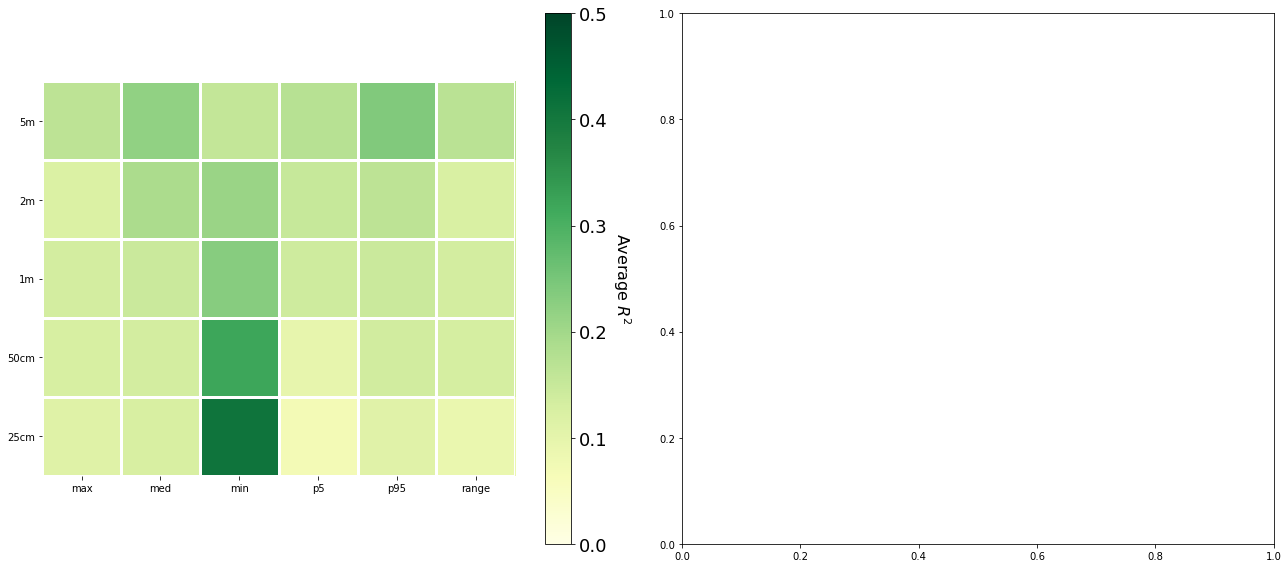

In [124]:
zonal_0219 = [f for f in metrics_0219 if 'zonal' in f]
zonal_0302 = [f for f in metrics_0302 if 'zonal' in f]
ind = ['5m','2m','1m','50cm','25cm']
cols = ['max','med','min','p5','p95','range']
df_0219 = pd.DataFrame(index=ind, columns=cols, dtype=float)
df_0302 = pd.DataFrame(index=ind, columns=cols, dtype=float)

for f0219, f0302 in zip(zonal_0219, zonal_0302):
    data_0219 = pd.read_csv(f0219, index_col=0)
    data_0302 = pd.read_csv(f0302, index_col=0)
    r2_0219 = data_0219['r2'].mean()
    r2_0302 = data_0302['r2'].mean()
    scale = re.findall(r'_\d{1,2}[a-z]{1,2}_', f0219)[0].split('_')[1]
    stat = f0219.split('_')[-2]
    df_0219.loc[scale, stat] = r2_0219
    df_0302.loc[scale, stat] = r2_0302
    
cmap = plt.get_cmap('YlGn')
vmin = 0
vmax = 0.5

dfs = [df_0219, df_0302]
fig, ax = plt.subplots(1, len(dfs), figsize=(9*len(dfs),8))
for df in dfs:
    j = dfs.index(df)
    im = ax[j].imshow(df_0219, cmap=cmap, vmin=vmin, vmax=vmax)
    ax[j].set_xticks(np.arange(df_0219.shape[1]+1)-.5, minor=True)
    ax[j].set_yticks(np.arange(df_0219.shape[0]+1)-.5, minor=True)
    ax[j].grid(which="minor", color="w", linestyle='-', linewidth=3)
    ax[j].tick_params(axis='both', which='minor', bottom=False, left=False)
    ax[j].set_xticks(ax[j].get_xticks()[1:-1])
    ax[j].set_yticks(ax[j].get_yticks()[1:-1])
    ax[j].set_xticklabels(cols)
    ax[j].set_yticklabels(ind)
    cbar = plt.colorbar(im, ax=ax[j])
    cbar.ax.set_ylabel('Average $R^2$', rotation=-90, va="bottom", fontsize=16)
    cbar.ax.tick_params(labelsize=18)

    ax[j].spines['bottom'].set_visible(False)
    ax[j].spines['top'].set_visible(False)
    ax[j].spines['left'].set_visible(False)
    ax[j].spines['right'].set_visible(False)
        
plt.tight_layout()
    
